In [1]:
from DataGenerator import DataGenerator
from Models import Models
from LoadData import LoadData
from BaselineHelperFunctions import BaselineHelperFunctions
from RandomGridSearch import RandomGridSearch
import json

helper = BaselineHelperFunctions()
%load_ext tensorboard

In [2]:
csv_root = 'csv_folder_3_class'
full_data_csv, train_csv, val_csv, test_csv = LoadData(csv_root, isBalanced = True).getData()
data_gen = DataGenerator(csv_root, train_csv, val_csv, test_csv)
full_ds = data_gen.load_dataset(full_data_csv)
train_ds = data_gen.load_dataset(train_csv)
val_ds = data_gen.load_dataset(val_csv)
test_ds = data_gen.load_dataset(test_csv)
nr_earthquakes, nr_explosions, nr_noise, nr_total = helper.get_class_distribution_from_csv(full_data_csv)

print(f"Earthquakes: {nr_earthquakes}, Explosions: {nr_explosions}, Noise: {nr_noise}, Total: {nr_total}")
print(f'Train_ds: {len(train_ds)}, Val_ds: {len(val_ds)}, Test_ds: {len(test_ds)}')

Earthquakes: 6852, Explosions: 6852, Noise: 6852, Total: 20556
Train_ds: 16444, Val_ds: 2878, Test_ds: 1234


In [3]:
hyper_grid = {
        "batch_size" : [8, 16, 32, 64, 128, 256],
        "epochs" : [50, 65, 70, 75, 80],
        "learning_rate" : [0.1, 0.01, 0.001, 0.0001, 0.00001],
        "optimizer" : ["adam", "rmsprop", "sgd"]
    }
model_grid = {
    "start_neurons" : [4,8,16, 32, 64, 128, 256, 512],
    "dropout_rate" : [0.5, 0.4, 0.3, 0.2, 0.1, 0.01, 0],
    "filters" : [9, 15, 17],
    "kernel_size" : [3],
    "padding" : ["same", "valid"],
    "l2_r" : [0.3, 0.2, 0.1, 0.01, 0.001, 0.0001],
    "l1_r" : [0.3, 0.2, 0.1, 0.01, 0.001, 0.0001],
    "activation" : ["relu", "sigmoid", "softmax", "tanh"],
    "output_layer_activation" : ["softmax"]
}




model_nr = 4
test_mode = True
detrend = False
n_picks = 40
use_tensorboard = False

randomGridSearch = RandomGridSearch(train_ds, val_ds, test_ds, model_nr, True,False, n_picks, hyper_grid = hyper_grid, model_grid = model_grid, use_tensorboard = use_tensorboard)

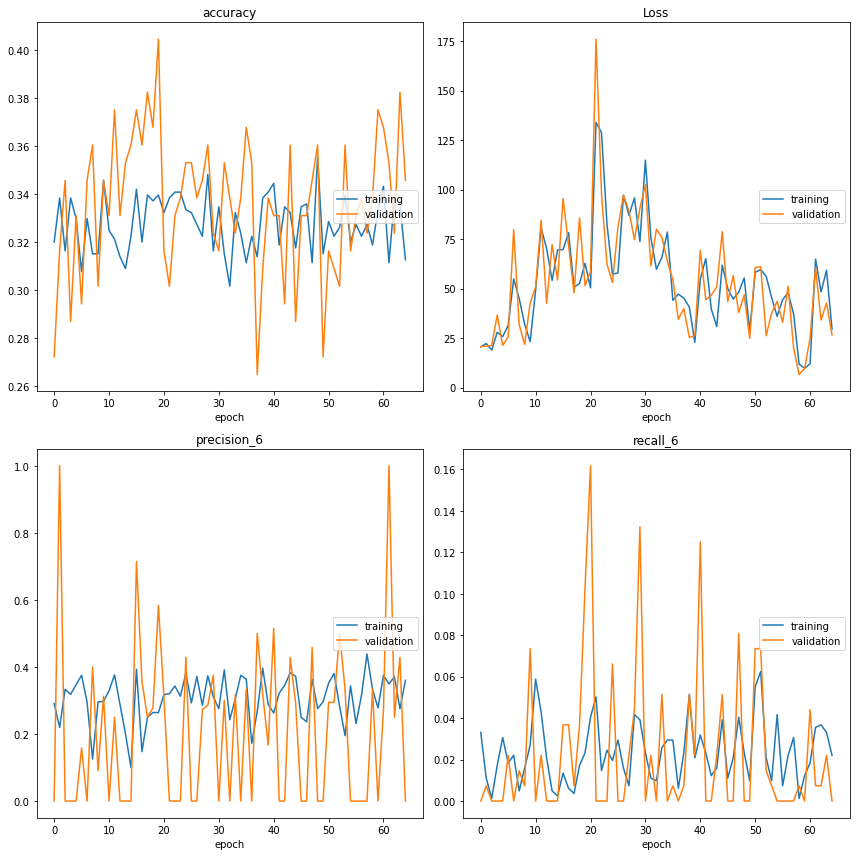

accuracy
	training         	 (min:    0.301, max:    0.355, cur:    0.312)
	validation       	 (min:    0.265, max:    0.404, cur:    0.346)
Loss
	training         	 (min:    9.750, max:  133.967, cur:   29.391)
	validation       	 (min:    6.629, max:  176.041, cur:   26.581)
precision_6
	training         	 (min:    0.100, max:    0.439, cur:    0.360)
	validation       	 (min:    0.000, max:    1.000, cur:    0.000)
recall_6
	training         	 (min:    0.001, max:    0.062, cur:    0.022)
	validation       	 (min:    0.000, max:    0.162, cur:    0.000)
102/102 [==============================] - 2s 22ms/step - loss: 29.3913 - accuracy: 0.3125 - precision_6: 0.3600 - recall_6: 0.0221 - val_loss: 26.5812 - val_accuracy: 0.3456 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (128, 8)              

InvalidArgumentError:  assertion failed: [predictions must be >= 0] [Condition x >= y did not hold element-wise:] [x (sequential_7/dense_7/Softmax:0) = ] [[-nan(ind) -nan(ind) -nan(ind)]...] [y (Cast_6/x:0) = ] [0]
	 [[{{node assert_greater_equal/Assert/AssertGuard/else/_209/assert_greater_equal/Assert/AssertGuard/Assert}}]] [Op:__inference_train_function_153385]

Function call stack:
train_function


In [4]:
results, highest_test_accuracy_index, highest_train_accuracy_index, highest_test_precision_index, highest_test_recall_index= randomGridSearch.fit()

In [ ]:
dictionaries = randomGridSearch.read_results()
print(dictionaries)
use_tensorboard = True


In [ ]:
def clear_tensorboard_dir():
    import os
    import shutil
    path = "tensorboard_dir/fit"
    files = os.listdir(path)
    print(files)
    for f in files:
        shutil.rmtree(os.path.join(path,f))
clear_tensorboard_dir()
%tensorboard --logdir tensorboard_dir/fit

**Highest test accuracy**

In [ ]:
model_test_accuracy = randomGridSearch.fit_from_result(dictionaries, highest_test_accuracy_index, use_tensorboard = use_tensorboard)

**Highest train accuracy**

In [ ]:
model_train_accuracy = randomGridSearch.fit_from_result(dictionaries, highest_train_accuracy_index, use_tensorboard = use_tensorboard)

**Highest precision**

In [ ]:
model_test_precision = randomGridSearch.fit_from_result(dictionaries, highest_test_precision_index, use_tensorboard = use_tensorboard)

**Highest recall**

In [ ]:
model_test_recall = randomGridSearch.fit_from_result(dictionaries, highest_test_recall_index, use_tensorboard = use_tensorboard)